Nếu cùng sấp hoặc cùng ngửa với người 1 thì người 2 mất 1. Ngược lại thì dược 1

- $E(S_2)=-p_1+1-p_1=-2p_1+1=E$
- $E(N_2)=p_1+p_1-1=2p_1-1=-E$
- $V(S_2)=(-1-E)^2p_1+(1-E)^2(1-p_1)\\ =(1+2E+E^2)p_1+(1-2E+E^2)(1-p_1)\\ =E^2+(4p_1-2)E+1$
- $V(N_2)=(1+E)^2p_1+(-1+E)^2(1-p_1)\\ =(1+2E+E^2)p_1+(1-2E+E^2)(1-p_1)\\ =E^2+(4p_1-2)E+1$
- $Cov(S_2,N_2)=-(1+E)^2p_1-(-1+E)^2(1-p_1)\\ =-[E^2+(4p_1-2)E+1]$
- $V(p_2S_2+(1-p_2)N_2)=(E^2+(4p_1-2)E+1)(p_2^2+(1-p_2)^2-2p_2(1-p_2))$
- $E(p_2S_2+(1-p_2)N_2)=(2p_1-1)(1-2p_2)$

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [70]:
class Calculation():
    def __init__(self,chien_luoc_1,chien_luoc_2,payoff1):
        self.chien_luoc_1 = np.array(chien_luoc_1)
        self.chien_luoc_2 = np.array(chien_luoc_2)
        self.payoff1 = payoff1

    def expected_value(self):
        E = np.dot(np.dot(self.chien_luoc_1.T, self.payoff1), self.chien_luoc_2)
        return E
    
    def variance(self):
        V = np.dot((np.dot(self.chien_luoc_1.T, self.payoff1)-self.expected_value())**2,self.chien_luoc_2)
        return V

In [84]:
class Graph(Calculation):
    def __init__(self, A, p2):
        self.A = A
        self.p2 = p2
        
        num =2
        ra1 = np.random.rand(50000, num)
        ra2 = np.random.rand(50000, num)
        self.x = ra1 / np.sum(ra1, axis=1, keepdims=True)
        self.y = ra2 / np.sum(ra2, axis=1, keepdims=True)

        self.max_index = 0
        
    def relation(self):
        e1 = []
        v1 = []       
        for i in range(50000):
            c = Calculation(payoff1=self.A, chien_luoc_1=self.x[i], chien_luoc_2=self.y[i])
            e1.append(c.expected_value())
            v1.append(c.variance())
        plt.scatter(v1, e1)

    def curve(self):
        e1 = []
        v1 = []

        y = np.array([self.p2, 1-self.p2])
        for i in range(50000):
            c = Calculation(payoff1=self.A, chien_luoc_1=self.x[i], chien_luoc_2=y)
            e1.append(c.expected_value())
            v1.append(c.variance())

        plt.scatter(v1, e1,color="pink")

        p = np.array([0, 1])
        c = Calculation(payoff1=self.A, chien_luoc_1=p, chien_luoc_2=y)
        plt.scatter(c.variance(),c.expected_value(),color= "yellow")

        q = np.array([1, 0])
        c= Calculation(payoff1=self.A, chien_luoc_1=q, chien_luoc_2=y)
        plt.scatter(c.variance(),c.expected_value(), color="red")


        self.max_index = np.argmax(np.array(e1)-np.array(v1))
        plt.scatter(v1[self.max_index],e1[self.max_index],color="green")

    def chien_luoc(self):
        return f"chien luoc la {self.x[self.max_index]}"
    

In [103]:
A = np.array([[1,-1],[-1,1]])
m = Graph(A,p2=0.8)

Mối quan hệ của E và V trên đồ thị

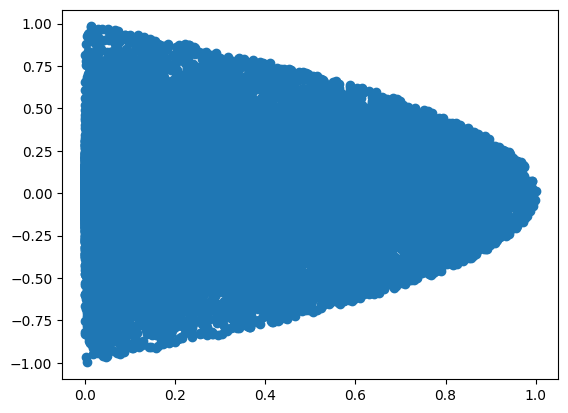

In [90]:
m.relation()

Điểm màu đỏ cho kỳ vọng cao nhất ứng với $p_1=1$

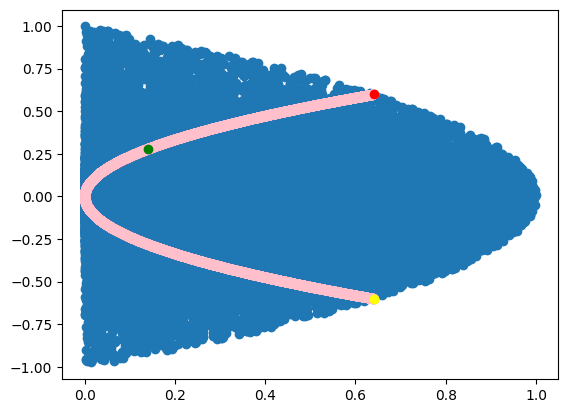

In [94]:
m.relation()
m.curve()

- Giả sử $p_2$ = 0.8, khi đó mối quan hệ giữa là đường màu hồng, điểm màu đỏ thể hiện khi $p_1=1,$ điểm màu vàng thể hiện khi $p_1=0$. Điểm màu vàng cho thấy khi $p_2=0.8$ thì tại đó ta có kỳ vọng thấp nhất, điểm màu đỏ cho biết kỳ vọng 
lớn nhất
- Dễ thấy từ đồ thị, điểm màu vàng cho kỳ vọng cao nhất nhưng var cũng cao nhất

Ngoài việc lấy kỳ vọng cao nhất, ta có thể lấy vài chỉ tiêu khác vd E-V. Điểm màu xanh lá sẽ là điểm cho E-V cao nhất. 

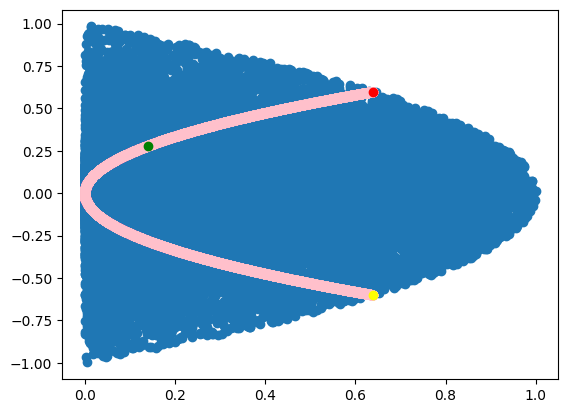

In [91]:
m.relation()
m.curve()

In [104]:
m.chien_luoc()

'chien luoc la [0.63073831 0.36926169]'

Khi $p_2=0$ thì ta có đồ thị sau, để có lợi nhuận lớn nhất thì $p_1$=0

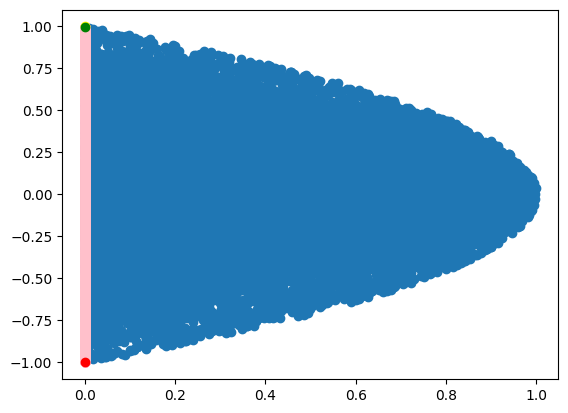

In [92]:
A = np.array([[1,-1],[-1,1]])
m = Graph(A,0)
m.relation()
m.curve()

In [88]:
m.chien_luoc()

'chien luoc la [7.91314093e-06 9.99992087e-01]'

# Kiểm tra chiến lược

In [100]:
import sys
path = "../Back_test"
sys.path.append(path)

from back_test import Kiem_dinh

In [105]:
payoff1 = [[1,-1],[-1,1]]
payoff2 = [[-1,1],[1,-1]]
a = [0.63073831, 0.36926169]

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Lợi ích thu được được', ylabel='Frequency'>)

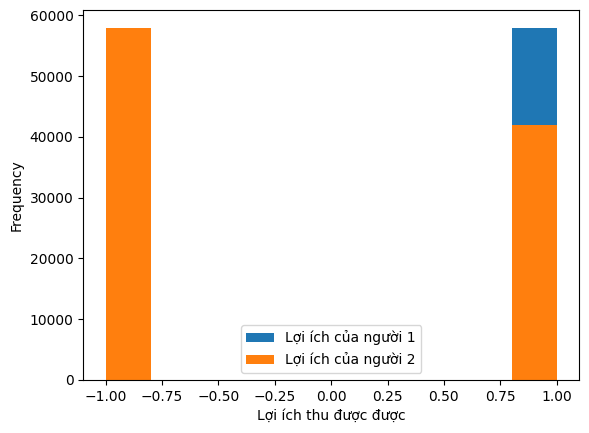

In [106]:
b = [0.8,0.2]
c=Kiem_dinh(so_chien_luoc1=2, so_chien_luoc2=2, payoff1=payoff1, payoff2=payoff2, mix_stra1=a, mix_stra2=b)
c.mat_do_loi_ich()

Khi người 1 chọn chiến lược $p_1=1$ khi $p_2=0.8$

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot: xlabel='Lợi ích thu được được', ylabel='Frequency'>)

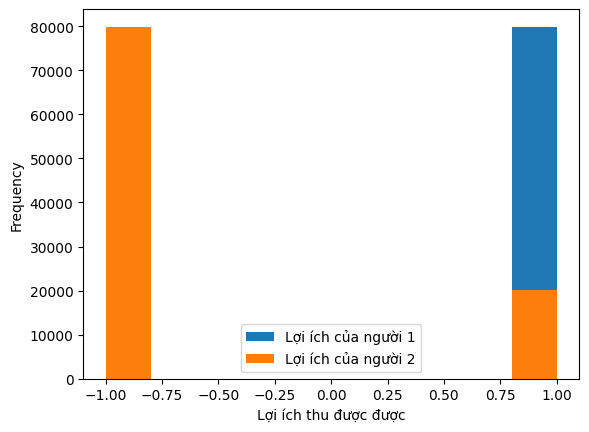

In [107]:
payoff1 = [[1,-1],[-1,1]]
payoff2 = [[-1,1],[1,-1]]
a = [1,0]
b = [0.8,0.2]
c=Kiem_dinh(so_chien_luoc1=2, so_chien_luoc2=2, payoff1=payoff1, payoff2=payoff2, mix_stra1=a, mix_stra2=b)
c.mat_do_loi_ich()

Vậy Lợi ích thu được khi $p_1=1$ là lớn nhất và cũng là chiến lược tối ưu

# Tìm chiến lược bằng Q learning

In [1]:
import sys
path = "../Q learning"
sys.path.append(path)

from find_strategy import find_best_strategy

In [33]:
payoff1 = [[1,-1],[-1,1]]

In [ ]:
a= find_best_strategy(payoff=payoff1,num_strategy=2,prob_rival=[1/3,2/3])
a.run()

In [36]:
a.show_statistics()

Strategy 0 with k: 497
Strategy 1 with k: 9503
